In [15]:
import numpy as np
from helpers import *
from implementations import *
from data_processing import *
from hyperparams import *
# from classification import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
%reload_ext autoreload # run this when want to update changes in a function

In [17]:
# loading train data (takes 10 secs, avoid spamming cell)
yb, input_data, ids = load_csv_data("train.csv")
dimensions = np.shape(input_data)
N = dimensions[0]
P = dimensions[1]
yb = np.reshape(yb,[N,1])
yb[yb==-1] = 0

#voir si fait du sens de prendre le log apres std ??
print(input_data)

[[ 138.47    51.655   97.827 ...    1.24    -2.475  113.497]
 [ 160.937   68.768  103.235 ... -999.    -999.      46.226]
 [-999.     162.172  125.953 ... -999.    -999.      44.251]
 ...
 [ 105.457   60.526   75.839 ... -999.    -999.      41.992]
 [  94.951   19.362   68.812 ... -999.    -999.       0.   ]
 [-999.      72.756   70.831 ... -999.    -999.       0.   ]]


In [18]:
#Test quantity of -999

for column in range(0,input_data.shape[1]) : 
    x = input_data[:,column]
    nan = x[x == -999] 
    if (len(nan)>= input_data.shape[1]/2) : 
        tx_means_std = standardize_data_median(input_data) #for each column with more than 125 000 NaN, take the median instead of the mean (half the data is absent, so we take the median to be less sensitive to outliers)
    else : 
        tx_means_std = standardize_data_mean(input_data)

print(input_data)

NameError: name 'standardize_data_median' is not defined

In [19]:
# standardize data without the incomplete points, calculations done on _rem arrays (with -999 lines removed)
y_rem, tx_rem_std = standardize_data_removed(yb,(input_data))
tx_means_std = standardize_data_mean((input_data))

tx_rem_std = add_w0(tx_rem_std,tx_rem_std.shape[0])   
tx_means_std = add_w0(tx_means_std,N)  
print(input_data) 

[[ 1.38470000e+02  5.16550000e+01  9.78270000e+01 ...  1.24000000e+00
  -2.47500000e+00  1.13497000e+02]
 [ 1.60937000e+02  6.87680000e+01  1.03235000e+02 ... -1.18452642e-02
  -1.58228913e-03  4.62260000e+01]
 [ 5.43254426e+01  1.62172000e+02  1.25953000e+02 ... -1.18452642e-02
  -1.58228913e-03  4.42510000e+01]
 ...
 [ 1.05457000e+02  6.05260000e+01  7.58390000e+01 ... -1.18452642e-02
  -1.58228913e-03  4.19920000e+01]
 [ 9.49510000e+01  1.93620000e+01  6.88120000e+01 ... -1.18452642e-02
  -1.58228913e-03  0.00000000e+00]
 [ 5.43254426e+01  7.27560000e+01  7.08310000e+01 ... -1.18452642e-02
  -1.58228913e-03  0.00000000e+00]]


In [ ]:
#means = np.mean((input_data), axis=0) * np.ones(np.shape(np.log(input_data)))
#tx_new = np.log(input_data) - means
#std_dev = np.std(np.log(input_data), axis=0) * np.ones(np.shape(np.log(input_data)))
#tx_new = tx_new / std_dev   

In [ ]:
tx_reduced = (tx_rem_std[range(10000),:])  # 100x30 data for faster testing of regression
y_reduced = yb[0:10000]
ratio = 0.8

y_tr, x_tr, y_te, x_te = split_data(y_reduced,tx_reduced,ratio)

In [ ]:
initial_w = np.zeros([31,1])   
max_iters = 50
gamma = 0.4
w_opt,loss = logistic_regression(y_tr,x_tr,initial_w,max_iters,gamma)

In [ ]:
np.shape(initial_w)
print(np.shape(w_opt))
print(loss)              #"PROBLEM nan"

loss de départ : 0.6392192267962796


In [ ]:
number_of_elements = 1000

for i in range(number_of_elements):
    if i % 100 == 0:
        print(i)
    best_lambda, best_rmse = cross_validation_demo(y_reduced, tx_reduced, 7, 4, initial_w,  np.logspace(-4, 0, 30), 3 ,gamma, max_iters)
    print(best_rmse)#Here should be the code that does the computation.

print('Done')

In [ ]:
# Construct the matrix with the polynomial expansion for each column
size_x_tr = x_tr.shape[0]
gamma = 0.5 #Quite low to avoid NaN
lambdas = np.logspace(-2, -1, 30) #the lambda tested for the logistic regression, for each lambda we test each degree
initial_w = np.ones([size_x_tr,1])
max_iters = 80
degrees_tested = [1,2,3,4,5,6,7,8] #the degrees tested for the polynoms
phi, degrees_poly =phi_optimized(y_tr,x_tr,degrees_tested,P, 4, initial_w, lambdas, gamma,max_iters)

print(phi.shape)

In [ ]:
print(phi.shape)

In [ ]:
print(phi)

In [ ]:
#Here : problems NaN with cross_validation... Possible solutions : réduire le pas gamma ? ajouter un tout petit epsilon pour eviter la division par 0, verifier qu'on introduit pas un NaN avec la data

new_size = np.sum(degrees_poly)  +1  #size of the new input data 
initial_w = np.ones([new_size,1]) 
best_lambda, best_rmse = cross_validation_demo(y_tr, phi, 7, 4,initial_w,  np.logspace(-4, 0, 30), 3 ,gamma, max_iters ) #test for the best lambda, in the matrix expanded


In [ ]:
#Calculate the weights for the best lambda, with the train data
gamma = 0.5
w_opt,loss = reg_logistic_regression(y_tr, phi, best_lambda, initial_w, max_iters, gamma)

print (w_opt)

In [ ]:
degrees_poly = np.array(degrees_poly)
print(degrees_poly.shape)
print (w_opt)

phi_te = np.ones([x_te.shape[0],1]) 
for column in range (1,x_te.shape[1]) :  #shape -1 car degree ne prend pas en compte la colonne de uns
    new_cols = build_poly(x_te[:,column], degrees_poly[column-1])
    phi_te = np.c_[phi_te,new_cols]

In [ ]:
print(phi_te.shape)
print(phi.shape)
print(degrees_poly)


In [ ]:
def get_accuracy(y_predictions, y_te):
    """Checks whether prediction are accurate by compraing with y_te
    
    Args: 
        predictions:
        y_te:
    
    Returns:
        len(good_guess):
        len(bad_guess):
    """ 
    
    difference = (y_predictions-y_te)
    good_guess = difference[difference==0]
    bad_guess = difference[difference!=0]
    print(len(good_guess),len(bad_guess))
    
    return len(good_guess), len(bad_guess)

In [ ]:

temporary = sigmoid(phi_te@w_opt)
y_result = temporary
y_result[y_result>0.5] = 1
y_result[y_result<0.5] = 0
right, wrong = get_accuracy(y_result, y_te)
print(right/(right+wrong))



In [ ]:
#Plot each feature ENLEVER LES OUTLIERS ! 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

for column in range(input_data.shape[1]) : 
    
    plt.hist((input_data[:,column]), bins=40)
    plt.xlabel('X label' + np.str(column))
    plt.ylabel('Y label')
    plt.show()



In [ ]:
plt.scatter(tx_rem_std[:,23], y_rem)

The log of each feature approximately follows a normal distribution. 
--> visualize each scale
--> make each feature have the same scale and follow more or less normal distribution

--> leave out the non normal distributions (without log), and standardize the one with normal distribution
--> if resulting plots are still skewed, probably outliers (or would be gaussian)

données non gaussiennes : skewed : ne pas normaliser : utiliser PowerTransformer

https://scikit-learn.org/stable/modules/preprocessing.html



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
idx_incomplete_points = np.nonzero(input_data[:,4]==-999)
tx_rem = np.delete(input_data,idx_incomplete_points,0)

for column in range(tx_rem.shape[1]) : 
    
    plt.hist((tx_rem[:,column]), bins=40)
    plt.xlabel('X label' + np.str(column))
    plt.ylabel('Y label')
    plt.show()



In [ ]:
plt.hist((tx_rem[:,4]), bins=40)
plt.xlabel('X label' + np.str(4))
plt.ylabel('Y label')
plt.show()

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
idx_incomplete_points = np.nonzero(input_data[:,4]==-999)
tx_rem = np.delete(input_data,idx_incomplete_points,0)
apply_log = [0,2,3,7,8,9,10,13,16,19,21,22,23,29]
for column in apply_log : 
    
    plt.hist(np.log(tx_rem[:,column]), bins=40)
    plt.xlabel('X label' + np.str(column))
    plt.ylabel('Y label')
    plt.show()

NameError: name 'input_data' is not defined

In [ ]:
plt.hist(np.log(tx_rem[:,0]), bins=40)
plt.xlabel('X label' + np.str(0))
plt.ylabel('Y label')
plt.show()

In [ ]:
plt.hist(np.log(tx_rem[:,2]), bins=40)
plt.xlabel('X label' + np.str(0))
plt.ylabel('Y label')
plt.show()

In [3]:
yb, input_data, ids = load_csv_data("train.csv")
dimensions = np.shape(input_data)
N = dimensions[0]
P = dimensions[1]
yb = np.reshape(yb,[N,1])
yb[yb==-1] = 0

In [4]:
idx_incomplete_points = np.nonzero(input_data[:,4]==-999)
tx_rem = np.delete(input_data,idx_incomplete_points,0)
y_new = np.delete(yb,idx_incomplete_points,0)
#idx_incomplete_points_0 = np.nonzero(input_data[:,0]==-999)
#tx_rem = np.delete(input_data,idx_incomplete_points_0,0)


In [ ]:
"""#Test Box-Cox : permet de transformer skewed data en normal (normalement)
lambdas = [-3,-2,-1,-0.5,0.5,1,2,3]
for lambda1 in lambdas : 
    for lambda2 in lambdas : 
        x_box = ((tx_rem[:,4]+lambda2)**lambda1 - 1)/lambda1
        plt.hist(x_box, bins=40)
        plt.xlabel('X label' + 'lambda1 = '+ np.str(lambda1) + 'lambda2='+ np.str(lambda2))
        plt.ylabel('Y label')
        plt.show()"""

In [5]:
#Normalisation log gaussian features
#SOUCIS PREMIERE COLONNE -999 ! 


indices_gaussian_log = [2,3,5,7,9,10,19,23] # a enlevé 21 et 29

for x in indices_gaussian_log :
     #print(len(np.nonzero(tx_rem[:,x]==0)))
     print(tx_rem[:,x])
     c = tx_rem[:,x]
     c = np.log(tx_rem[:,x])
     mean = np.mean(c, axis=0)
     std_dev = np.std(c, axis=0)
  
     tx_rem[:,x] = (c -mean*np.ones(np.shape(c))) / std_dev
     print(tx_rem.shape)
     print(tx_rem[:,x])
     """plt.hist(tx_rem[:,x], bins=40)
     plt.xlabel('X label' + np.str(x))
     plt.ylabel('Y label')
     plt.show()"""



[ 97.827  59.149 107.782 ... 749.97   66.781  62.824]
(72543, 30)
[ 0.74372828 -0.4822149   0.9798574  ...  5.70663406 -0.18651415
 -0.33534398]
[ 27.98  116.344 106.13  ...  77.877  77.369 127.953]
(72543, 30)
[-1.48464239  0.39516141  0.2739535  ... -0.1343541  -0.14298694
  0.52062359]
[124.711 284.584 158.359 ... 216.006 322.296 119.437]
(72543, 30)
[-0.67127085  0.19406485 -0.42073568 ... -0.09512767  0.3245863
 -0.71659188]
[3.064 1.362 2.941 ... 4.351 3.102 2.318]
(72543, 30)
[ 1.17388776 -0.695914    1.07939852 ...  1.98264091  1.20231371
  0.53041617]
[197.76  278.876 305.967 ... 583.68  610.482 242.586]
(72543, 30)
[-0.67287936  0.20196993  0.43794377 ...  2.08188431  2.19615743
 -0.15287131]
[1.582 0.588 3.371 ... 0.275 1.354 1.393]
(72543, 30)
[ 0.41700785 -1.06455952  1.54948647 ... -2.20218211  0.1840411
  0.22654952]
[ 16.824  40.735  38.421 ... 159.927  67.702  97.737]
(72543, 30)
[-1.24347586 -0.10049558 -0.17608858 ...  1.66723828  0.55615756
  1.03073707]
[ 67.435  9

/var/folders/xl/7xxnqhrj2l7f4ypwccgd0rnm0000gn/T/ipykernel_1608/1208840023.py:10: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.xlabel('X label' + np.str(x))


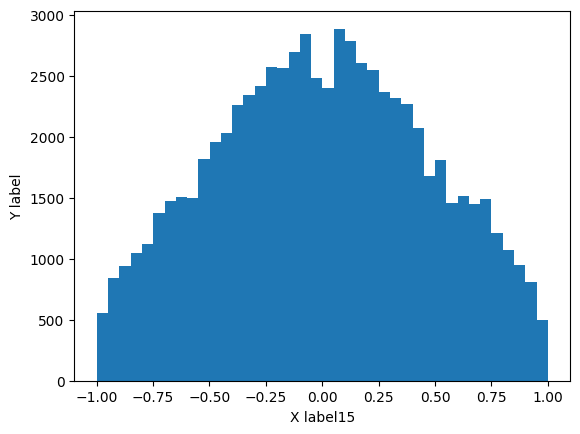

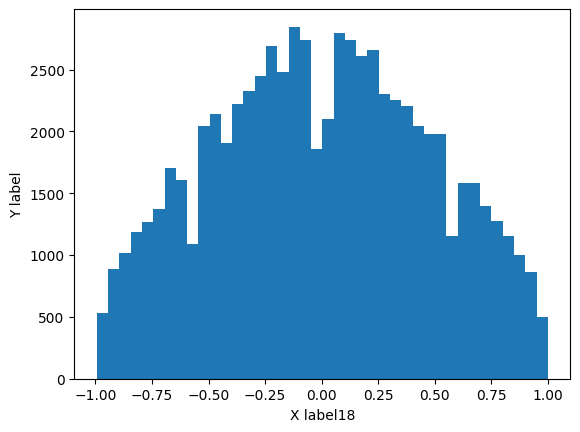

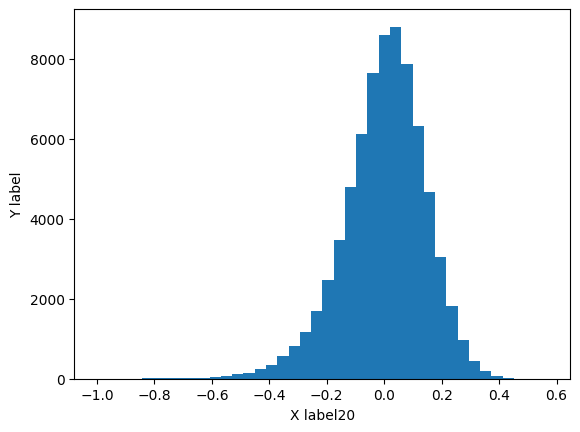

In [20]:
#center and [-1,1] uniform features
indices_uniform = [15,18,20]
for x in indices_uniform : 
    c = tx_rem[:,x]
    mean = np.mean(c, axis=0)
  
    tx_rem[:,x] = (c - mean) 
    tx_rem[:,x] = tx_rem[:,x]/np.max(np.abs(tx_rem[:,x]))
    plt.hist(tx_rem[:,x], bins=40)
    plt.xlabel('X label' + np.str(x))
    plt.ylabel('Y label')
    plt.show()


In [ ]:
#puor l'instant, supprime la première colonne le temps d'avoir un truc pour enlever les -999
#tx_rem = np.delete(input_data,0,0)

/var/folders/xl/7xxnqhrj2l7f4ypwccgd0rnm0000gn/T/ipykernel_1608/167082925.py:10: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.xlabel('X label' + np.str(x))


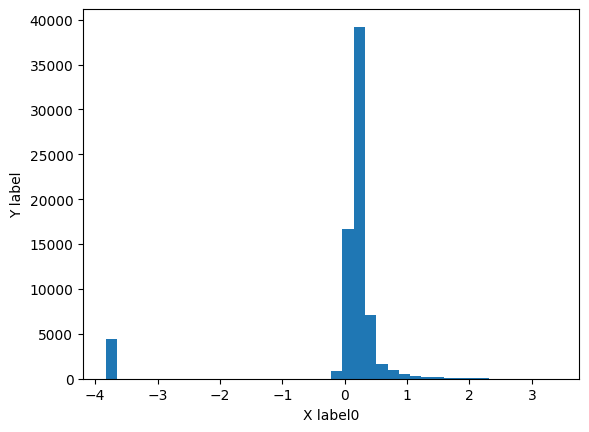

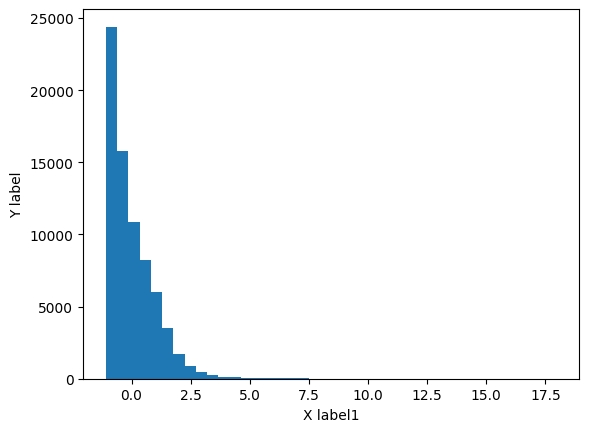

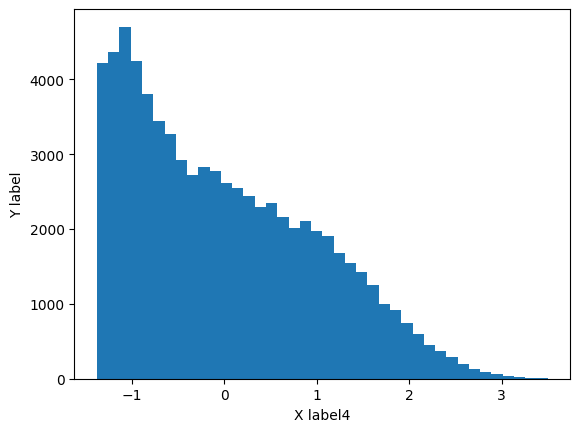

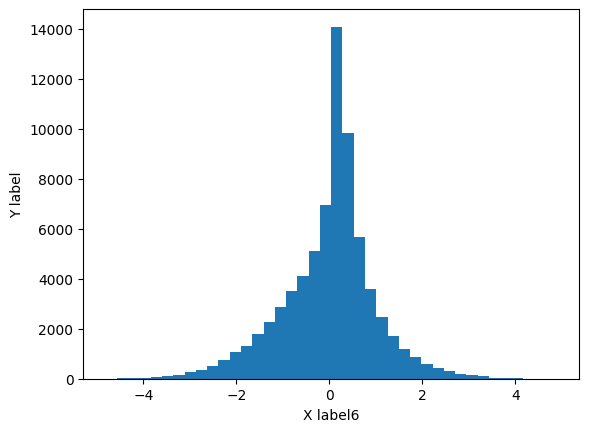

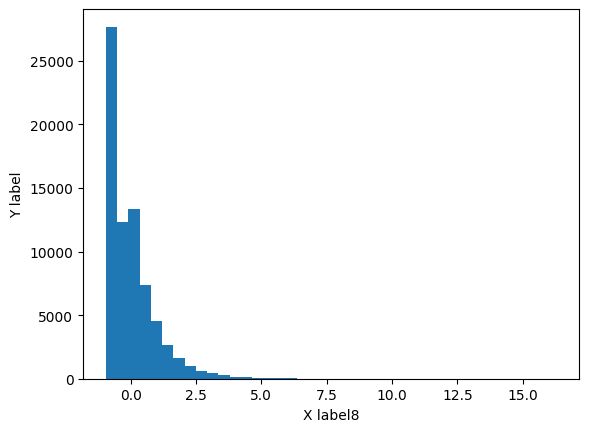

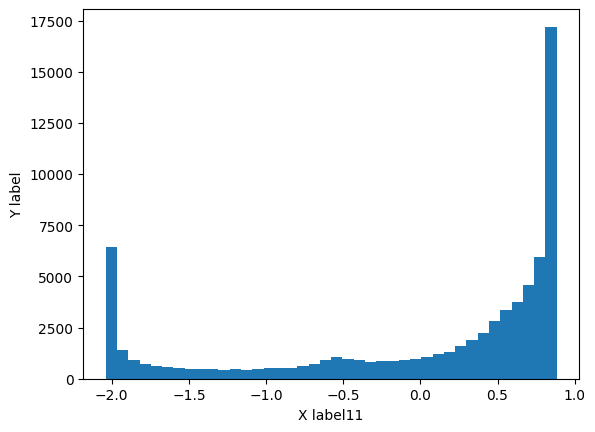

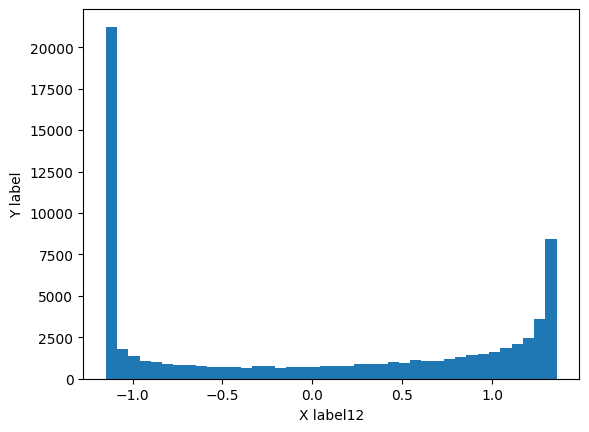

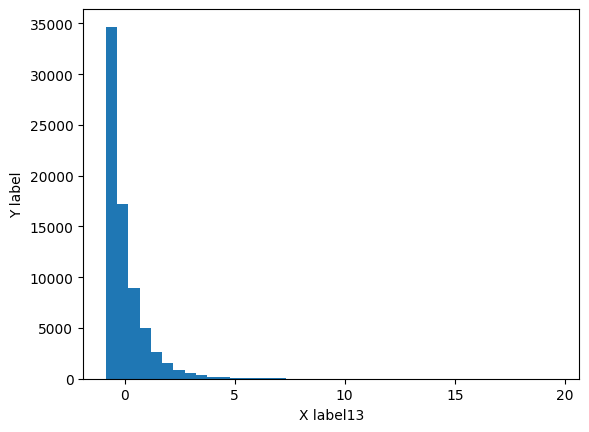

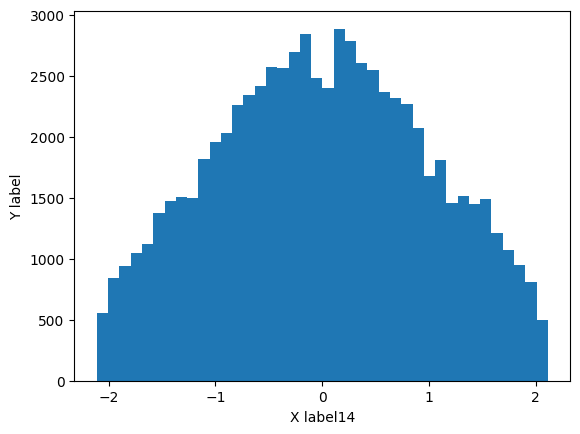

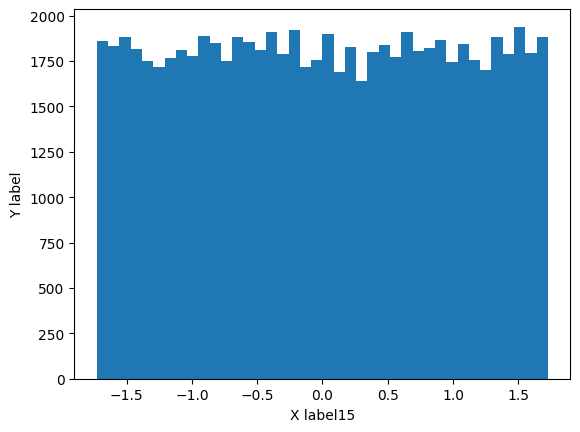

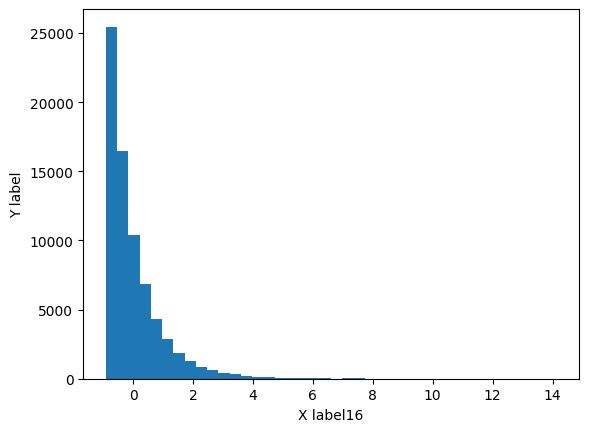

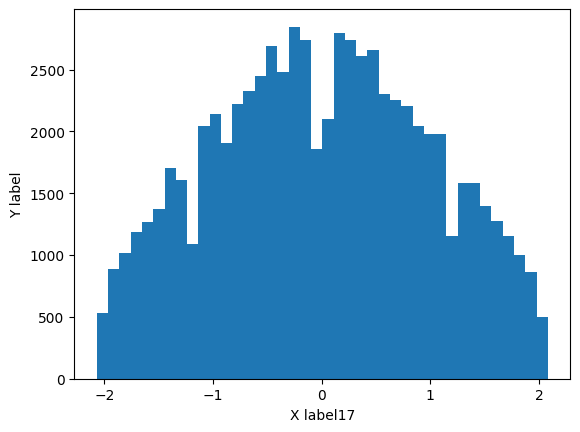

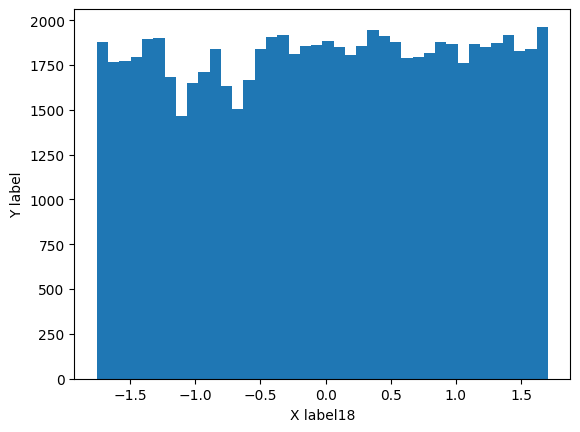

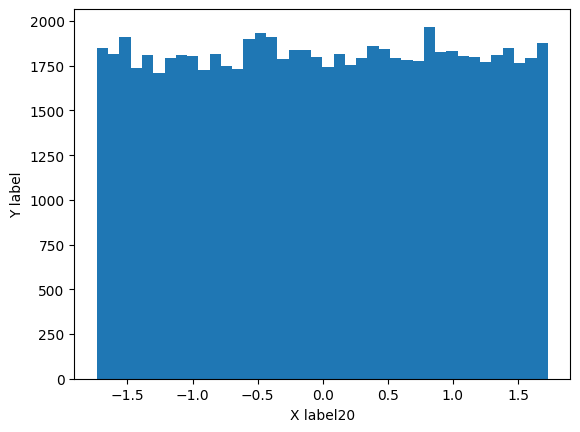

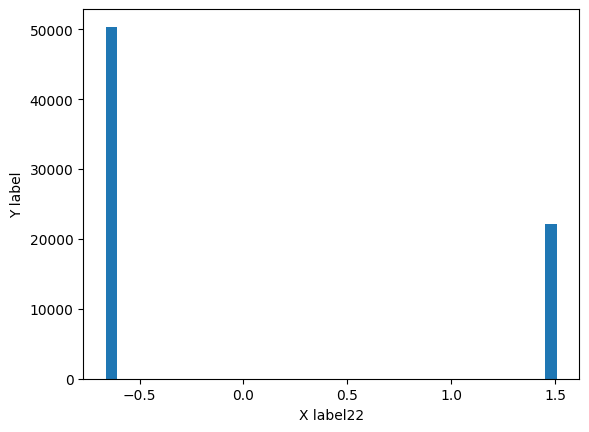

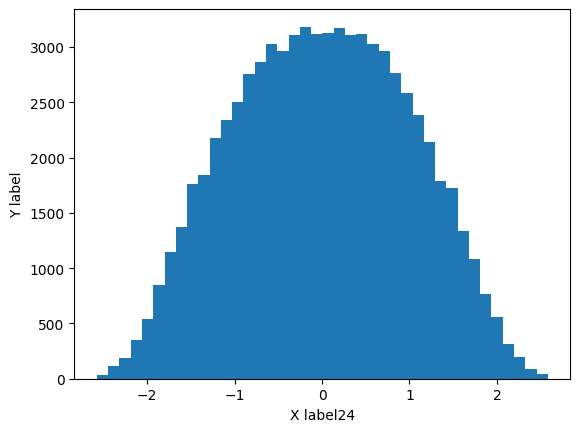

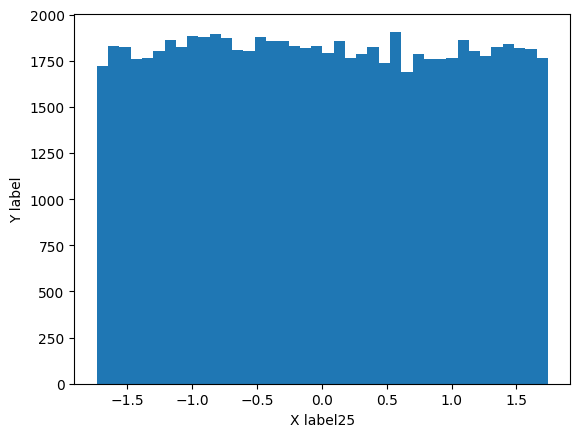

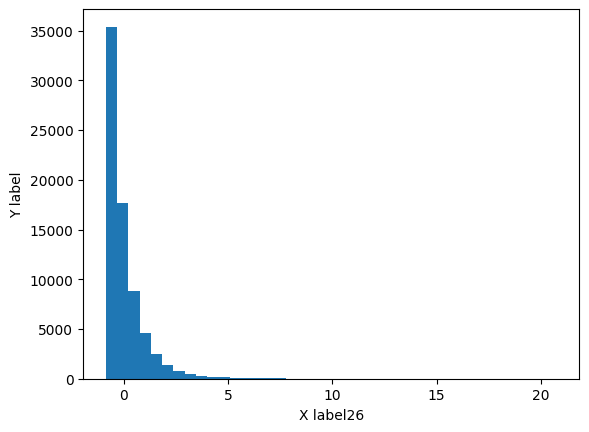

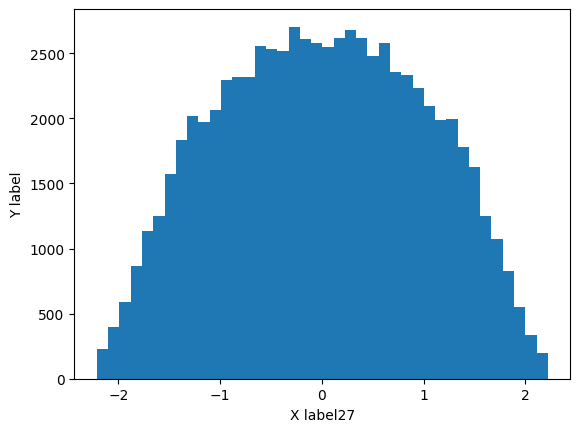

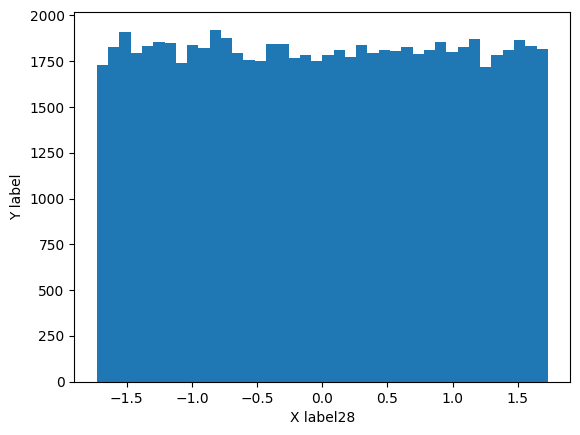

(72543, 28)


In [6]:
#standardisation normale pour les quelques colonnes qui semblent gaussiennes
#[2,3,5,7,9,10,19,21,23,29]
indices_gaussian =[0,1,4,6,8,11,12,13,14,16,17,22,24,25,26,27,28]
for x in indices_gaussian :
     c = tx_rem[:,x]
     mean = np.mean(c, axis=0)
     std_dev = np.std(c, axis=0)
     tx_rem[:,x] = (c -mean*np.ones(np.shape(c))) / std_dev
     plt.hist(tx_rem[:,x], bins=40)
     plt.xlabel('X label' + np.str(x))
     plt.ylabel('Y label')
     plt.show()
tx_rem = np.delete(tx_rem,29,1)
tx_rem = np.delete(tx_rem,21,1)


print(tx_rem.shape)


     

In [7]:
plt.hist(np.log(tx_rem[:,28]), bins=40)
plt.ylabel('Y label')
plt.show()

IndexError: index 28 is out of bounds for axis 1 with size 28

In [8]:
tx_rem = add_w0(tx_rem,tx_rem.shape[0])   
tx_reduced = (tx_rem[range(10000),:])  # 100x30 data for faster testing of regression
y_reduced = (y_new[range(10000)])
ratio = 0.8

y_tr, x_tr, y_te, x_te = split_data(y_reduced,tx_reduced,ratio)


In [9]:
initial_w = np.zeros([x_tr.shape[1],1])   
max_iters = 50
gamma = 0.4
w_opt,loss = logistic_regression(y_tr,x_tr,initial_w,max_iters,gamma)

In [10]:
print(loss)
print(w_opt.shape)

0.5401219778666491
(29, 1)


In [11]:
def get_accuracy(y_predictions, y_te):
    """Checks whether prediction are accurate by compraing with y_te
    
    Args: 
        predictions:
        y_te:
    
    Returns:
        len(good_guess):
        len(bad_guess):
    """ 
    
    difference = (y_predictions-y_te)
    good_guess = difference[difference==0]
    bad_guess = difference[difference!=0]
    print(len(good_guess),len(bad_guess))
    
    return len(good_guess), len(bad_guess)

In [12]:
temporary = sigmoid(x_te@w_opt)
y_result = temporary
y_result[y_result>0.5] = 1
y_result[y_result<0.5] = 0
right, wrong = get_accuracy(y_result, y_te)
print(right/(right+wrong))

1415 585
0.7075


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from math import dist,ceil



def get_Kneighbors(x_tr, K, new_sample):
    """Finds K nearest neighbors using euclidian distance
    
    Args:
        x_tr: 
        K: 
        new_sample: 
        
    Returns:
        Kneighbors:
        Kindexes:    
    """
    samples = np.shape(x_tr)[0] 
    neighbors = np.zeros((samples,1))
    Kneighbors = np.zeros((K,1))
    Kindexes = np.zeros((K,1))
    
    for i in range (samples):
        neighbors[i] = dist(x_tr[i,:], new_sample)  #computes euclidean distance between two samples
           
    for j in range (K):
        Kneighbors[j] = min(neighbors)
        idx = np.argmin(neighbors)
        #remove for the next iteration the last smallest value:
        Kindexes[j] = idx
        neighbors = np.delete(neighbors, idx)
        
    return Kneighbors, Kindexes  




def get_prediction(Kindexes, K, y_tr):
    """Predicts y = 0 or 1 using the prediction of K-nearest neighbors
    
    Args:
        Kindexes: 
        K:  
        
    Returns:
        predictions:
        new_prediction:    
    """
    
    predictions = np.zeros((K,1))
    
    for m in range (K):
        predictions[m] = y_tr[np.int(Kindexes[m])]  #warning because of forced int()
        
    scoreKNN = np.mean(predictions)
        
    if scoreKNN >= 0.5:
        new_prediction = 1
    else:
        new_prediction = 0
        
    return scoreKNN, new_prediction



def get_accuracy(y_results, y_te, score):
    """Checks whether prediction are accurate by compraing with y_te
    
    Args: 
        predictions:
        y_te:
    
    Returns:
        len(good_guess):
        len(bad_guess):
    """ 
    
    difference = (y_results-y_te)
    good_guess = difference[difference==0]
    bad_guess = difference[difference!=0]
    accuracy = len(good_guess)/(len(good_guess)+len(bad_guess))
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    
    for i in range(y_results.shape[0]):
        if difference[i] == 1:
            FP +=1
        if difference[i] == -1:
            FN +=1
        else :
            if y_results[i] == 1:
                TP +=1
            else:
                TN +=1       
                
    precision = TP/(TP+FP)  
    recall = TP/(TP+FN)
    auc = get_auc(score, y_te)
    #print(f"How well our model can classify binary outcomes: accuracy of {accuracy}, precision of {precision}, and recall of {recall}")
    print("How well our model can classify binary outcomes: accuracy of %.3f, precision of %.3f, recall of %.3f, and AUC score of %.3f" % (accuracy, precision, recall, auc))
    
    return accuracy, precision, recall



def get_auc(score, y_results):

    y = y_results

    # false positive rate
    FPR = []
    # true positive rate
    TPR = []
    # Iterate thresholds from 0.0 to 1.0
    thresholds = np.arange(0.0, 1.01, 0.001)
    print(len(thresholds))

    # get number of positive and negative examples in the dataset
    P = sum(y)
    N = len(y) - P

    # iterate through all thresholds and determine fraction of true positives
    # and false positives found at this threshold
    for thresh in thresholds:
        FP=0
        TP=0
        thresh = round(thresh,2) 
        for i in range(len(score)):
            if (score[i] >= thresh):
                if y[i] == 1:
                    TP += 1
                if y[i] == 0:
                    FP += 1            
        FPR = np.append(FPR,FP/N)
        TPR = np.append(TPR, TP/P)

    #computing Arean Under Curve using the trapezoidal method
    auc = -1 * np.trapz(TPR, x=FPR)
    print(auc)

    
    plt.plot(FPR, TPR, marker='.', color='darkorange', label='ROC curve', clip_on=False)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label = 'No Discrimination')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC curve, AUC = %.2f'%auc)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.savefig('AUC_example.png')
    plt.show()
    
    return auc

1010
0.7857374735356386


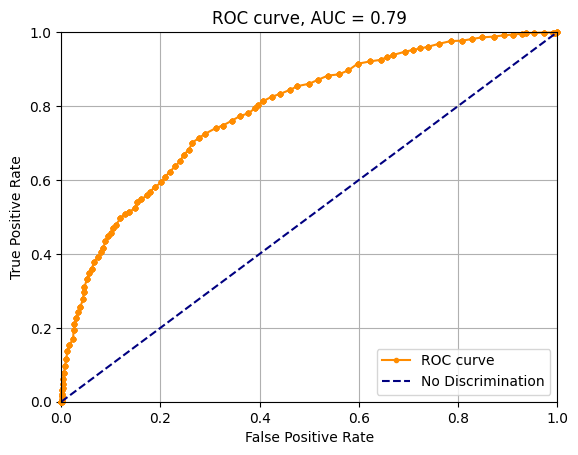

How well our model can classify binary outcomes: accuracy of 0.708, precision of 0.774, recall of 0.687, and AUC score of 0.786


In [14]:
temporary = sigmoid(x_te@w_opt)
y_result = temporary
y_result[y_result>0.5] = 1
y_result[y_result<0.5] = 0
score = sigmoid(x_te@w_opt)
accuracy, precision, recall = get_accuracy(y_result, y_te, score)